In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
%matplotlib inline

In [7]:
df=pd.read_excel('POL Daten.xlsx',sheet_name='t, phi')
df.head()

,Time [s],Phi [deg] 0.2A,Phi [deg] 0.29A,Phi [deg] 0.4A,Phi [deg] 0.5A,Phi [deg] 0.59A,Phi [deg] 0.7A,Phi [deg] 0.8A,Phi [deg] 0.9A,Phi [deg] 1A,Phi [deg] 1.1A,Phi [deg] 1.2A,Phi [deg] 1.3A,Phi [deg] 1.4A,Phi [deg] 1.49A
0,0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.02,-0.01
1,0.08,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2,0.13,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01
3,0.18,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
4,0.23,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01


<AxesSubplot:xlabel='Time [s]'>

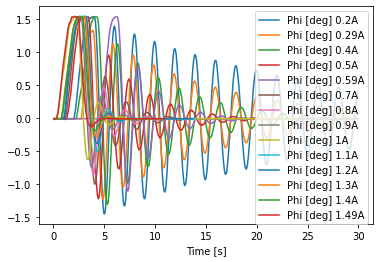

In [9]:
df.plot(x="Time [s]")

Code for just one set of data

In [78]:
labels=list(df.columns)  #Nehme mir die labels von den spalten
labels=labels[1:] #Erste weg, ist ja t
lam_list=[] #list for lambdas and omegas
omega_list=[]
beta_list=[]
phi0_list=[]
for title in labels: #iterate over all columns, apart from first one
    Phi0=df[title].max() #finding max value, will be Phi0, to check if correct just look at above graph
    t=df['Time [s]'] #define x data
    phi=df[title].dropna() #define y data, dropna makes sure i have no nans in my data, which are there since the datasets 
    #are not all the same length
    if len(t)!= len(phi): #just making sure that x and y have the same length
        t=t[:len(phi)]
    def func(t, lam, omega, beta): #defining ,my function here after finding Phi0, otherwise have to use lambda funct to 
        #pass parameter i think
        return Phi0*np.exp(-lam*t)*np.cos(omega*t+beta)
    popt, pcov = curve_fit(func, t, phi) #this is just fitting, we are interested in the first to things that popt returns
    lam_list.append(popt[0])
    omega_list.append(popt[1])
    beta_list.append(popt[2])
    phi0_list.append(Phi0)

'auto'

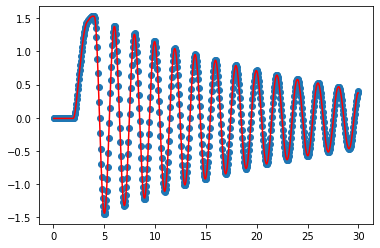

In [129]:
labels=list(df.columns)  #Nehme mir die labels von den spalten
labels=labels[1:] #Erste weg, ist ja t
title=labels[0]

x_lin=df['Time [s]'] #define x data
y=df[title].dropna()
x_lin=np.array(x_lin).reshape(len(x_lin),1)
model=KNeighborsRegressor(n_neighbors=3)
model.fit(x_lin,y)
y_model=model.predict(x_lin)
plt.scatter(x_lin,y)
plt.plot(x_lin,y_model, c='r')
model.

array([0.77916062, 0.16230218, 1.56438978, 1.13467984])

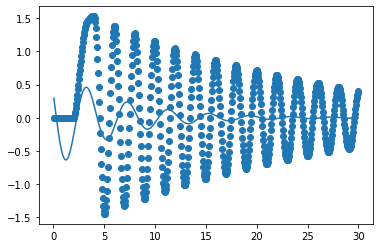

In [107]:
labels=list(df.columns)  #Nehme mir die labels von den spalten
labels=labels[1:] #Erste weg, ist ja t
title=labels[0]
t=df['Time [s]'] #define x data
phi=df[title].dropna() #define y data, dropna makes sure i have no nans in my data, which are there since the datasets 
#are not all the same length
#if len(t)!= len(phi): #just making sure that x and y have the same length
   # t=t[:len(phi)]
def func(t, phi0, lam, omega, beta): #defining ,my function here after finding Phi0, otherwise have to use lambda funct to 
    #pass parameter i think
    return phi0*np.exp(-lam*t)*np.cos(omega*t+beta)
popt, pcov = curve_fit(func, t, phi) #this is just fitting, we are interested in the first to things that popt returns
phi0t=popt[0]
lambdat=popt[1]
omegat=popt[2]
betat=popt[3]
plt.plot(t,func(t,phi0t, lambdat,omegat,betat))
plt.scatter(t,phi)
popt

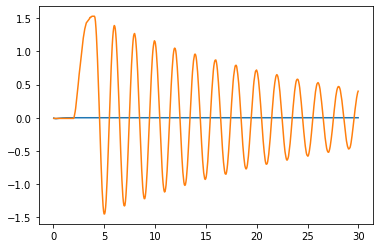

In [83]:
Phi0=phi0_list[0]
plt.plot(df['Time [s]'],func(df['Time [s]'],lam_list[0],omega_list[0],beta_list[0]))
plt.plot(df['Time [s]'],df['Phi [deg] 0.2A'])

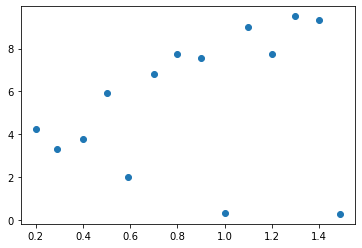

In [76]:
current=[0.2,0.29,0.4,0.5,0.59,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.49]
plt.scatter(current,lam_list)

In [77]:
lam_list

[4.25908815900994,
 3.302679164263983,
 3.789511854107758,
 5.9251463540933536,
 2.005013491335265,
 6.805401898156954,
 7.721124564721391,
 7.568890146302837,
 0.30779659228706896,
 9.022142349737816,
 7.720761172377688,
 9.508818372805877,
 9.35046005348947,
 0.2695965644684099]